# Dimensionality Reduction for Classification 

## CIFAR-10

The Canadian Institute for Advanced Research - 10 Classes (CIFAR-10) Dataset is a dataset that consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

It is commonly used as a benchmark for image classification models. 

The binaries for the dataset were obtained from [The University of Toronto](https://www.cs.toronto.edu/~kriz/cifar.html), and the data was collected and by Alex Krizhevsky in their paper [Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf)

The following is the table of the classes in CIFAR-10:

Class Index  | Class Name
-------------|-----------
0            | airplane
1            | automobile
2            | bird
3            | cat
4            | deer
5            | dog
6            | frog
7            | horse
8            | ship
9            | truck

For the purposes of this assignment, we will be using pictures of dogs and cats  ONLY.


### Extracting Training Set

In [200]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt

In [201]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define class labels for "cat" and "dog"
cat_label = 3  # CIFAR-10 label for "cat"
dog_label = 5  # CIFAR-10 label for "dog"

# Filter the dataset to include only "cat" and "dog" images
cat_indices = np.where(y_train == cat_label)[0]
dog_indices = np.where(y_train == dog_label)[0]
selected_indices = np.concatenate((cat_indices, dog_indices))

x_train_filtered = x_train[selected_indices]
y_train_filtered = y_train[selected_indices]

# Filter the testing dataset as well
cat_indices_test = np.where(y_test == cat_label)[0]
dog_indices_test = np.where(y_test == dog_label)[0]
selected_indices_test = np.concatenate((cat_indices_test, dog_indices_test))

x_test_filtered = x_test[selected_indices_test]
y_test_filtered = y_test[selected_indices_test]

# Printing the shape of filtered datasets
print("Filtered Training Data Shape:", x_train_filtered.shape)
print("Filtered Testing Data Shape:", x_test_filtered.shape)

Filtered Training Data Shape: (10000, 32, 32, 3)
Filtered Testing Data Shape: (2000, 32, 32, 3)


#### Verifying dataset was filtered correctly

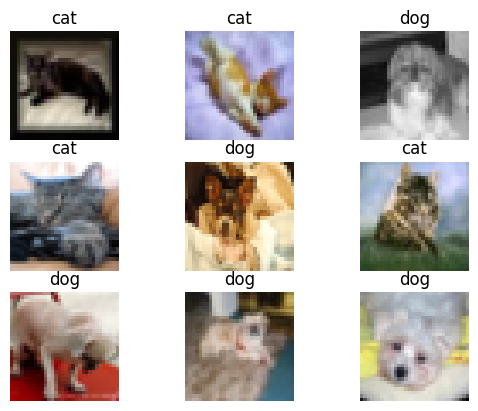

In [202]:
import random

def class_to_classname(e):
    if e[0] == 3:
        return "cat"
    elif e[0] == 5:
        return "dog"
    else:
        return "something is wrong"

for i in range(0,9):
    randInt = random.randint(0, 9999)
    plt.subplot(330 + 1 + i)
    img = x_train_filtered[randInt]
    plt.title(class_to_classname(y_train_filtered[randInt]))
    plt.axis('off')
    plt.imshow(img)

plt.show()

In [203]:
x_train_filtered[1].shape

(32, 32, 3)

Verifying correct dataset initialization:

## Normalize training and testing data

Since the data in CIFAR-10 is standardized to 32x32 images, there is no need to perform alignment.

In [204]:
x_train_filtered = x_train_filtered.astype('float32')
x_test_filtered = x_test_filtered.astype('float32')

x_train_filtered = x_train_filtered / 255.0
x_test_filtered = x_test_filtered / 255.0

# values have now been normalized between 0 and 1

In [205]:
# rename vars
x_train = x_train_filtered
x_test = x_test_filtered
y_train = y_train_filtered
y_test = y_test_filtered

In [206]:
for i in y_train:
    if i[0] == 3:
        i[0] = 0
    elif i[0] == 5:
        i[0] = 1
    else:
        raise Exception("Something is wrong with CIFAR")

### New classes:

Class Number | Class
-|-
0| cat
1| dog

## Creating feature vectors

In [207]:
print(x_train[0])

[[[0.49019608 0.49019608 0.45490196]
  [0.43137255 0.39607844 0.35686275]
  [0.4        0.3529412  0.3254902 ]
  ...
  [0.7921569  0.8117647  0.8392157 ]
  [0.78431374 0.8039216  0.83137256]
  [0.7921569  0.8156863  0.8392157 ]]

 [[0.5568628  0.57254905 0.5568628 ]
  [0.57254905 0.5647059  0.54509807]
  [0.6901961  0.6745098  0.6666667 ]
  ...
  [0.7647059  0.7882353  0.8039216 ]
  [0.7764706  0.8039216  0.81960785]
  [0.8        0.827451   0.84313726]]

 [[0.7058824  0.7254902  0.7176471 ]
  [0.56078434 0.57254905 0.57254905]
  [0.6117647  0.6156863  0.6156863 ]
  ...
  [0.47843137 0.43529412 0.44313726]
  [0.54509807 0.5019608  0.5137255 ]
  [0.61960787 0.5764706  0.5882353 ]]

 ...

 [[0.40784314 0.32156864 0.16078432]
  [0.39607844 0.3137255  0.15294118]
  [0.39607844 0.31764707 0.14901961]
  ...
  [0.49411765 0.40392157 0.2627451 ]
  [0.49411765 0.40392157 0.27058825]
  [0.49019608 0.39607844 0.26666668]]

 [[0.40784314 0.31764707 0.15686275]
  [0.4117647  0.32941177 0.16078432]


In [208]:
# Flatten the animals
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Printing the shape of the flattened datasets
print("Flattened Training Data Shape:", x_train_flattened.shape)
print("Flattened Testing Data Shape:", x_test_flattened.shape)

Flattened Training Data Shape: (10000, 3072)
Flattened Testing Data Shape: (2000, 3072)


In [209]:
class_to_classname = lambda x: "cat" if (x == 0) else "dog"

In [210]:
print(x_train_flattened[4999])
print(class_to_classname(y_train[4999]))

[0.16078432 0.11372549 0.08235294 ... 0.9490196  0.8156863  0.8039216 ]
cat


## Classification BEFORE Dimensionality Reduction

In [211]:
cat_samples = x_train_flattened[y_train.flatten() == 0]
dog_samples = x_train_flattened[y_train.flatten() == 1] 

In [212]:
# Calculate mean vectors for each class
mean_cat = np.mean(cat_samples, axis=0)
mean_dog = np.mean(dog_samples, axis=0)

# Calculate covariance matrices for each class
cov_cat = np.cov(cat_samples, rowvar=False)
cov_dog = np.cov(dog_samples, rowvar=False)

In [213]:
def mahalanobis_distance(x, mean, cov):
    # Calculate Mahalanobis distance
    diff = x - mean
    inv_cov = np.linalg.inv(cov)
    distance = np.sqrt(np.dot(np.dot(diff, inv_cov), diff.T))
    return distance

def mahalanobis_classifier(sample, mean_cat, cov_cat, mean_dog, cov_dog):
    # Calculate Mahalanobis distance for both classes
    dist_to_cat = mahalanobis_distance(sample, mean_cat, cov_cat)
    dist_to_dog = mahalanobis_distance(sample, mean_dog, cov_dog)
    
    # Classify based on minimum distance
    if dist_to_cat < dist_to_dog:
        return 0  # Cat
    else:
        return 1  # Dog

In [214]:
# Verify classifier works on test set

print(class_to_classname(mahalanobis_classifier(x_train_flattened[4000], mean_cat, cov_cat, mean_dog, cov_dog)))
print(class_to_classname(y_train[4000]))

cat
cat


In [215]:
for i in y_test:
    if i[0] == 3:
        i[0] = 0
    elif i[0] == 5:
        i[0] = 1
    else:
        raise Exception("Something is wrong with CIFAR")

In [216]:
from IPython.display import clear_output
import os
import pickle

In [217]:
print(class_to_classname(mahalanobis_classifier(x_test_flattened[3], mean_cat, cov_cat, mean_dog, cov_dog)))
print(class_to_classname(y_test[3][0]))


cat
cat


In [218]:
# Calculate classifier accuracy

n_tests = len(x_test_flattened)
n_correct =  0
test_1_results = [] # index: test number, value: test result

if not os.path.isfile("ASSIGNMENT_test_1_results.pkl"):
    for i in range(0, n_tests):
        sample = x_test_flattened[i]
        predicted_class = mahalanobis_classifier(sample, mean_cat, cov_cat, mean_dog, cov_dog)
        print(f'Performing test {i + 2} of {n_tests}...')
        true_label = y_test[i][0]
        print(f'Actual class: {class_to_classname(true_label)}')
        
        print(f'Predicted class: {class_to_classname(predicted_class)}')
        
        if predicted_class == true_label:
            n_correct += 1
            test_1_results.append(True)
        else:
            test_1_results.append(False)

        cumulative_accuracy = (n_correct) / (i+1)
        print(f'Current Accuracy: {n_correct} out of {i+1} ({round(cumulative_accuracy, 3) * 100} %)')
        
        clear_output(wait=True)

    results_1_tuple = (n_correct, test_1_results)

    with open('ASSIGNMENT_test_1_results.pkl', 'wb') as file:
        pickle.dump(results_1_tuple, file)

else:
    with open('ASSIGNMENT_test_1_results.pkl', 'rb') as file:
        print("Pickeled results found! Loading from pickle...")
        results_1_tuple = pickle.load(file)
        n_correct = results_1_tuple[0]
        test_1_results = results_1_tuple[1]



Pickeled results found! Loading from pickle...


In [219]:
print(f"Final Accuracy: {n_correct} out of {n_tests} ({round((n_correct / n_tests),3) * 100} %)")

Final Accuracy: 1258 out of 2000 (62.9 %)


In [220]:
import time
import random

In [221]:
# Getting classifier timings

test_1_timings = []

sample_index = random.randint(0, (n_tests-50))

for i in range(0, 50):
    sample = x_test_flattened[i]
    st = time.time()
    predicted_class = mahalanobis_classifier(sample, mean_cat, cov_cat, mean_dog, cov_dog)
    et = time.time()
    test_1_timings.append((et-st))
    print(f'Performing test {i + 1} of 50...')
    true_label = y_test[i][0]
    print(f'Actual class: {class_to_classname(true_label)}')
    print(f'Predicted class: {class_to_classname(predicted_class)}')
    print(f'Prediction took {et-st} seconds to make.')
    clear_output(wait=True)

Performing test 50 of 50...
Actual class: cat
Predicted class: dog
Prediction took 3.4290621280670166 seconds to make.


In [222]:
test_1_average = sum(test_1_timings)/len(test_1_timings)

print(f'Before PCA, the classifier takes {test_1_average} seconds to make a classification on average.')

Before PCA, the classifier takes 3.513226714134216 seconds to make a classification on average.


## PCA: Finding Optimal Number of Components

In [223]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_flattened)

explained_variance = pca.explained_variance_ratio_

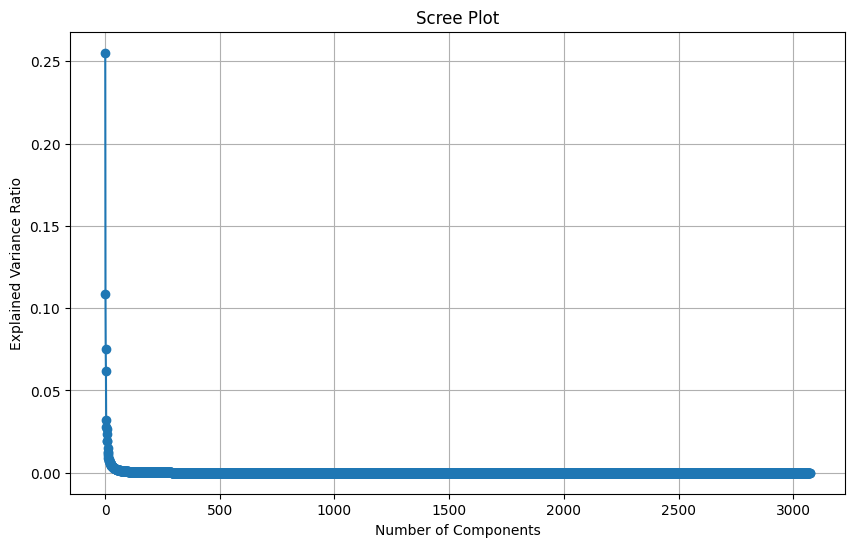

In [224]:
# Plotting the Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

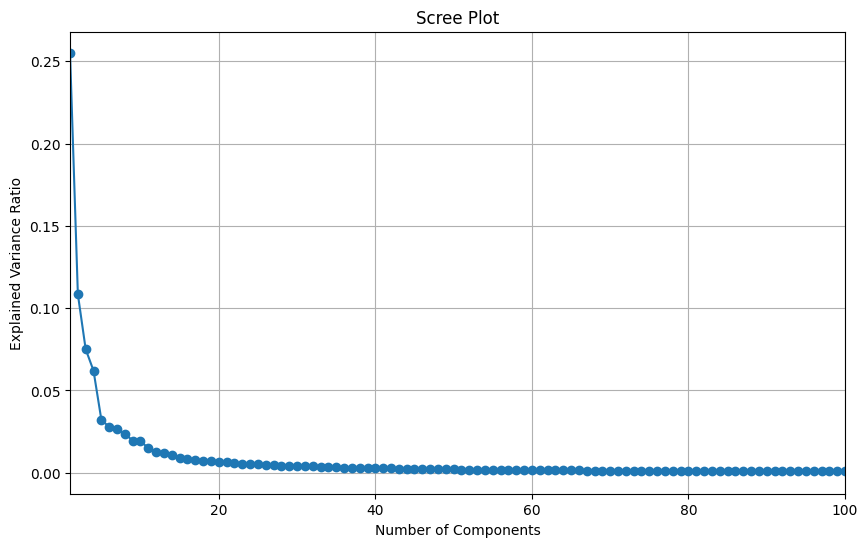

In [225]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.xlim(1,100)
plt.show()

We note an elbow at n=79.

## Classification AFTER Dimensionality Reduction

In [226]:
n = 79

pca = PCA(n_components=n)

pca.fit(x_train_flattened)

x_train_pca = pca.transform(x_train_flattened)
x_test_pca = pca.transform(x_test_flattened)

In [227]:
cat_samples = x_train_pca[y_train.flatten() == 0]
dog_samples = x_train_pca[y_train.flatten() == 1] 

# Calculate mean vectors for each class
mean_cat = np.mean(cat_samples, axis=0)
mean_dog = np.mean(dog_samples, axis=0)

# Calculate covariance matrices for each class
cov_cat = np.cov(cat_samples, rowvar=False)
cov_dog = np.cov(dog_samples, rowvar=False)

In [228]:
# Calculate classifier accuracy

n_tests = len(x_test_pca)
n_correct =  0
test_2_results = [] # index: test number, value: test result

if not os.path.isfile("ASSIGNMENT_test_2_results.pkl"):
    for i in range(0, n_tests):
        sample = x_test_pca[i]
        predicted_class = mahalanobis_classifier(sample, mean_cat, cov_cat, mean_dog, cov_dog)
        print(f'Performing test {i + 2} of {n_tests}...')
        true_label = y_test[i][0]
        print(f'Actual class: {class_to_classname(true_label)}')
        
        print(f'Predicted class: {class_to_classname(predicted_class)}')
        
        if predicted_class == true_label:
            n_correct += 1
            test_2_results.append(True)
        else:
            test_2_results.append(False)

        cumulative_accuracy = (n_correct) / (i+1)
        print(f'Current Accuracy: {n_correct} out of {i+1} ({round(cumulative_accuracy, 3) * 100} %)')
        
        clear_output(wait=True)

    results_2_tuple = (n_correct, test_2_results)

    with open('ASSIGNMENT_test_2_results.pkl', 'wb') as file:
        pickle.dump(results_2_tuple, file)

else:
    with open('ASSIGNMENT_test_2_results.pkl', 'rb') as file:
        print("Pickeled results found! Loading from pickle...")
        results_2_tuple = pickle.load(file)
        n_correct = results_2_tuple[0]
        test_2_results = results_2_tuple[1]


Pickeled results found! Loading from pickle...


In [229]:
print(f"Final Accuracy: {n_correct} out of {n_tests} ({round((n_correct / n_tests),3) * 100} %)")

Final Accuracy: 1300 out of 2000 (65.0 %)


In [233]:
# Getting classifier timings

test_2_timings = []

sample_index = random.randint(0, (n_tests-50))

for i in range(0, 50):
    sample = x_test_pca[i]
    st = time.time()
    predicted_class = mahalanobis_classifier(sample, mean_cat, cov_cat, mean_dog, cov_dog)
    et = time.time()
    test_2_timings.append((et-st))
    print(f'Performing test {i + 1} of {50}...')
    true_label = y_test[i][0]
    print(f'Actual class: {class_to_classname(true_label)}')
    print(f'Predicted class: {class_to_classname(predicted_class)}')
    print(f'Prediction took {et-st} seconds to make.')
    clear_output(wait=True)

Performing test 50 of 50...
Actual class: cat
Predicted class: dog
Prediction took 0.03662300109863281 seconds to make.


In [234]:
test_2_average = sum(test_2_timings)/len(test_2_timings)

print(f'After PCA, the classifier takes {test_2_average} seconds to make a classification on average.' )

After PCA, the classifier takes 0.04055276393890381 seconds to make a classification on average.


In [232]:
import matplotlib as mpl
from sklearn import __version__ as sklearn_version

# Print versions of the libraries
print(f"NumPy version: {np.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
print(f"Scikit-Learn version: {sklearn_version}")

NumPy version: 1.25.1
TensorFlow version: 2.14.0
Matplotlib version: 3.7.2
Scikit-Learn version: 1.3.1
